### Advanced Features
#### A. Token Feautres:
 1. cwc_min: Ratio of number of common words to the length of the smaller question.
 2. cwc_max: Ratio of number of common words to the length of the larger question.
 3. csc_min: Ratio of number of common stop words to the smaller stop word count among the two questions
 4. csc_max: Ratio of number of common stip words to the larger stop word count among the two questions
 5. ctc_min: Ratio of number of common tokens to the smaller token count among the two questions
 6. ctc_max: Ratio of number of common tokens to the larger token count among the two questions
 7. last_word_eq: 1 if last word in the two questions is same. 0 otherwise
 8. first_word_eq: 1 if first word in the two questions is same. 0 otherwise
#### B. Length Based Features
 1. mean_len: Mean of the length of the two questions
 2. abs_len_diff: Absolute difference between the length of the two questions
 3. longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
#### C. Fuzzy Features
 1. fuzz_ratio: fuzz_ratio from the fuzzywuzzy
 2. fuzz_partial: fuzz_partial from the fuzzywuzzy
 3. token_sort_ratio: token_sort_ratio from fuzzywuzzy
 4. token_set_ratio: toek_set_ratio from fuzzywuzzy
#### meaning of some words:
1. tokens: total number of elements in a sentence
2. stop words: total number of stop words
3. words: total number of elements in a sentence - stop words




In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup


In [65]:
df=pd.read_csv("train.csv")

In [66]:
new_df=df.sample(35000, random_state=2)

In [67]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [68]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile(r'\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [69]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

C:\Users\himal shah\AppData\Local\Temp\ipykernel_6216\2508584720.py:155: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [70]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


In [71]:
# Featuring engineering
new_df['q1_len']=new_df.question1.str.len()
new_df['q2_len']=new_df.question2.str.len()
new_df['q1_num_word']=new_df.question1.apply(lambda x:len(x.split()))
new_df['q2_num_word']=new_df.question2.apply(lambda x:len(x.split()))

In [72]:
# for common words:
def common_words(df):
    set1=set(df['question1'].lower().split())
    set2=set(df['question2'].lower().split())
    return len(set1 & set2)

In [73]:
new_df['word_common']=new_df.apply(common_words,axis=1)

In [74]:
def total_words(df):
    set1=set(df['question1'].lower().split())
    set2=set(df['question2'].lower().split())
    return (len(set1) +len(set2))

In [75]:
new_df['word_total']=new_df.apply(total_words,axis=1)

In [76]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,7,22,0.32
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,3,36,0.08
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,0,32,0.00
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13,0.23


In [103]:
### Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1=row['question1']
    q2=row['question2']
    
    SAFE_DIV=0.0001
    STOP_WORDS=stopwords.words('english')

    token_features=[0.0]*8

    # converting the sentence into tokens:
    q1_tokens=q1.split()
    q2_tokens=q2.split()

    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features

    # get the non-stopwords in questions
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])

    # get the stopwords in questions
    q1_stops= set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops= set([word for word in q2_tokens if word in STOP_WORDS])

    # get the common non-stopwords from question pair
    common_word_count=len(q1_words & q2_words)

    # get the common stopwords from the question pair
    common_stop_count=len(q1_stops & q2_stops)

    # get the common tokens from the question pair
    common_token_count = len(set(q1_tokens) & set(q2_tokens))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features
    

In [105]:

# Apply the function to each row and collect the results in a new DataFrame
token_features_df = new_df.apply(fetch_token_features, axis=1, result_type='expand')

# Rename the new feature columns
token_features_df.columns = [
    'cwc_min', 'cwc_max',
    'csc_min', 'csc_max',
    'ctc_min', 'ctc_max',
    'last_word_eq', 'first_word_eq'
]

# Concatenate the original DataFrame with the new features
new_df = pd.concat([new_df, token_features_df], axis=1)


In [107]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,26,0.46,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,...,22,0.32,0.666644,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,...,36,0.08,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,...,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,13,0.23,0.749981,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0


In [111]:
pip install distance


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16280 sha256=56a5b09dc6fa404f953fce0a5a09020e69fac83b3312684f3bdc064a12f119ba
  Stored in directory: c:\users\himal shah\appdata\local\pip\cache\wheels\24\a8\58\407063d8e5c1d4dd6594c99d12baa0108570b56a92325587dd
Successfully built distance


In [129]:
import distance
def fetch_lenght_features(row):
    q1=row['question1']
    q2=row['question2']
    
    length_features=[0.0]*3

    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
       return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [131]:

# Apply the function to each row and collect the results in a new DataFrame
length_features_df = new_df.apply(fetch_lenght_features, axis=1, result_type='expand')

# Rename the new feature columns
length_features_df.columns = [
   'abs_len_diff','mean_len', 'longest_substr_ratio'
]

# Concatenate the original DataFrame with the new features
new_df = pd.concat([new_df, length_features_df], axis=1)


In [133]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,...,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0,3.0,13.5,0.224490
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,...,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0,6.0,23.0,0.047619
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.050847
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0,4.0,7.0,0.542857


In [135]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [137]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

C:\Users\himal shah\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [141]:

# Apply the function to each row and collect the results in a new DataFrame
fuzzy_features_df = new_df.apply(fetch_fuzzy_features, axis=1, result_type='expand')

# Rename the new feature columns
fuzzy_features_df.columns = [
   'fuzz_ratio','fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio'
]

# Concatenate the original DataFrame with the new features
new_df = pd.concat([new_df, fuzzy_features_df], axis=1)


In [145]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,...,0.000000,0.0,0.0,17.0,21.5,0.050847,29,41,23,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.333330,1.0,0.0,4.0,7.0,0.542857,55,70,48,69


<Axes: xlabel='cwc_min', ylabel='Density'>

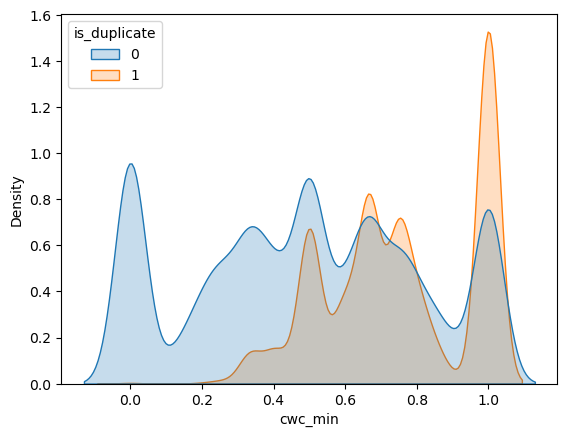

In [175]:
sns.kdeplot(data=new_df , x='cwc_min', hue="is_duplicate", fill=True)

sns.kdeplot(data=new_df , x='csc_min', hue="is_duplicate", fill=True)

<Axes: xlabel='ctc_min', ylabel='Density'>

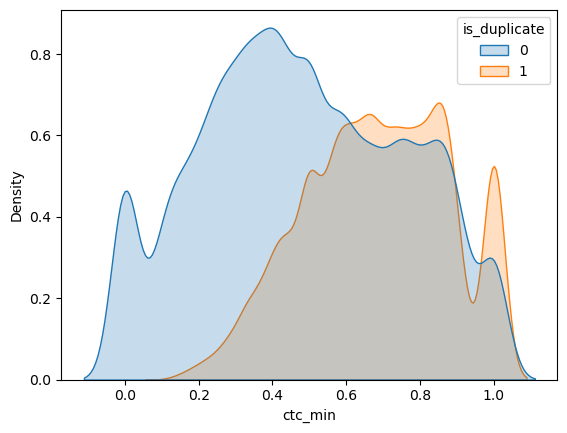

In [173]:
sns.kdeplot(data=new_df , x='ctc_min', hue="is_duplicate", fill=True)

Similarly test for all the new advanced features whether they are useful or not. for now, we keep all the features

In [178]:
q_df=new_df[['question1','question2']]
q_df.head()

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
327711,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
151235,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [180]:
final_df=new_df.drop(columns=["id",	"qid1",	"qid2",	"question1",	"question2"])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,0,48,56,12,15,7,22,0.32,0.666644,0.499988,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,0,104,119,26,20,3,36,0.08,0.000000,0.000000,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,0,58,145,13,30,0,32,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,17.0,21.5,0.050847,29,41,23,30
151235,0,34,49,5,9,3,13,0.23,0.749981,0.599988,...,0.333330,1.0,0.0,4.0,7.0,0.542857,55,70,48,69


In [182]:
from sklearn.feature_extraction.text import CountVectorizer

questions=pd.concat([q_df.question1,q_df.question2],axis=0)

cv=CountVectorizer(max_features=3000)
cv.fit(questions)

CountVectorizer(max_features=3000)

In [184]:
q1_vector=cv.transform(q_df.question1).toarray()
q2_vector=cv.transform(q_df.question2).toarray()

In [186]:
q1_vector.shape

(35000, 3000)

In [188]:
temp_vector=X=np.concatenate([q1_vector,q2_vector],axis=1)

In [190]:
temp_df=pd.DataFrame(temp_vector,index=q_df.index)

In [192]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
final_df2=pd.concat([final_df,temp_df],axis=1)
final_df2.head()

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,cwc_min,cwc_max,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
115086,0,48,56,12,15,7,22,0.32,0.666644,0.499988,...,0,0,0,0,0,0,0,0,0,0
327711,0,104,119,26,20,3,36,0.08,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
367788,0,58,145,13,30,0,32,0.00,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
151235,0,34,49,5,9,3,13,0.23,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [196]:
final_df2.shape

(35000, 6023)

In [198]:
final_df2.columns = final_df2.columns.astype(str)

In [200]:
X=final_df2.drop(columns=['is_duplicate'])
y=final_df2['is_duplicate']

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=41)

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7807142857142857

In [206]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7858571428571428

In [208]:
from sklearn.metrics import confusion_matrix

In [210]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3739,  679],
       [ 856, 1726]], dtype=int64)

In [212]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3681,  737],
       [ 762, 1820]], dtype=int64)

In [234]:
def test_common_words(q1,q2):
    w1 = set(q1.strip().lower().split())
    w2 = set(q2.strip().lower().split())    
    return len(w1 & w2)

In [232]:
def test_total_words(q1,q2):
    set1=set(q1.strip().lower().split())
    set2=set(q2.strip().lower().split())
    return (len(set1) +len(set2))

In [236]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV=0.0001
    STOP_WORDS=stopwords.words('english')

    token_features=[0.0]*8

    # converting the sentence into tokens:
    q1_tokens=q1.split()
    q2_tokens=q2.split()

    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features

    # get the non-stopwords in questions
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])

    # get the stopwords in questions
    q1_stops= set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops= set([word for word in q2_tokens if word in STOP_WORDS])

    # get the common non-stopwords from question pair
    common_word_count=len(q1_words & q2_words)

    # get the common stopwords from the question pair
    common_stop_count=len(q1_stops & q2_stops)

    # get the common tokens from the question pair
    common_token_count = len(set(q1_tokens) & set(q2_tokens))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features
    

In [238]:

def test_fetch_length_features(q1,q2):
    
    length_features=[0.0]*3

    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
       return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [242]:

def test_fetch_fuzzy_features(q1,q2):
      
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [244]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [246]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)


with open('cv.pkl', 'wb') as file:
    pickle.dump(cv, file)
